<a href="https://colab.research.google.com/github/azavalae/fisica_computacional/blob/main/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1



In [29]:
# Cargamos las bibliotecas para trabajar en Algebra Lineal.
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power as mpow


In [ ]:
#Definimos las matrices a utilizar.
A = np.array([[1,3],[-1,7]])
B = np.array([[5,2],[1,2]])
I = np.eye(2, dtype=int)
print(A)
print(B)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


In [ ]:
#Definimos la matriz R como el resultado de la operación.
R = 2*I + 3*A + A@B
print(R)

[[13 17]
 [-1 35]]


# Ejercicio 2

In [ ]:
#Definimos el polinomio característico de una matriz de 2x2.
def P(M):
  print(la.det(M)-np.trace(M)*M+M@M)

In [ ]:
P(I)

[[0. 1.]
 [1. 0.]]


# Ejercicio 3

In [1]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [5]:
C = np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
print(C)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [8]:
# 1) L2 + (-3)L1 -> L2
C1 = add_row(C,-3,1,0)
print(C1)

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [11]:
# 2) 1/5 L2 -> L2
#    L1 + 3 L2 -> L1
#    L3 + (-2)L2 -> L3
C2_tmp1 = scale_row(C1,1/5,1)
C2_tmp2 = add_row(C2_tmp1,3,0,1)
C2 = add_row(C2_tmp2,-2,2,1)
print(C2)


[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]


In [18]:
# 3) (-5)L3 -> L3
#    L1 + 1/5 L3 -> L1
#    L2 + 2/5 L3 -> L2
C3_tmp1 = scale_row(C2,-5,2)
C3_tmp2 = add_row(C3_tmp1,1/5,0,2)
C3 = add_row(C3_tmp2,2/5,1,2)
print(C3)

[[ 1.00000000e+00  0.00000000e+00 -9.99200722e-17  3.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -8.88178420e-17  2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  4.00000000e+00]]


In [22]:
# definimos b. Recordemos que tenemos que usar la función .reshape()
b = np.array([1,5,0]).reshape(3,1)

#Definimos la matriz C, omitiendo la comlumna de resultados
C_sqr = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])

# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(C_sqr, b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


# Ejercicio 4

In [25]:
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(B1)
print(B2)
print(B3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]
[[0 1 0]
 [0 0 1]
 [1 0 0]]
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [27]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals_B1, eigvecs_B1 = la.eig(B1)
print('Eigenvalores:', eigvals_B1)
print('Eigenvectores:', eigvecs_B1)

eigvals_B2, eigvecs_B2 = la.eig(B2)
print('Eigenvalores:', eigvals_B2)
print('Eigenvectores:', eigvecs_B2)

eigvals_B3, eigvecs_B3 = la.eig(B3)
print('Eigenvalores:', eigvals_B3)
print('Eigenvectores:', eigvecs_B3)

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]
Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


# Ejercicio 5

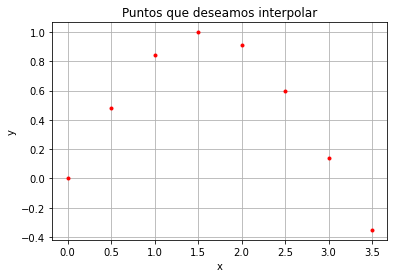

In [56]:
x = np.array([0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5])
y = np.array([0.0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])
plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos que deseamos interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
X = np.vander(x,increasing=True)
print(X[:5,:5])

[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]


In [39]:
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


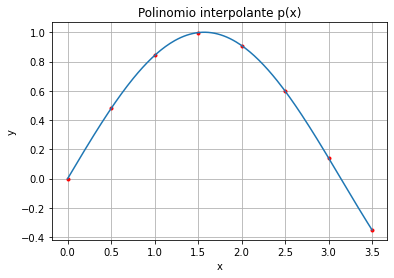

In [55]:
xs = np.linspace(0,3.5,200)
ys = sum([a[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys)
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()